In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

In [2]:
matches=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\matches.csv',parse_dates=['date'])
deliveries=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\deliveries.csv')

deliveries.wide_runs.replace(0,np.nan,inplace=True)

In [3]:
matches.head(6)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN


In [4]:
deliveries.head(6)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [5]:
mi_kxip=matches[((matches.team1=='Mumbai Indians') | (matches.team2=='Mumbai Indians')) & ((matches.team1=='Kings XI Punjab') | (matches.team2=='Kings XI Punjab'))]
mi=matches[(matches.team1=='Mumbai Indians') | (matches.team2=='Mumbai Indians')]
kxip=matches[(matches.team1=='Kings XI Punjab') | (matches.team2=='Kings XI Punjab')]
mi_kxip.shape,mi.shape,kxip.shape

((24, 18), (187, 18), (176, 18))

In [6]:
mi_kxipdeli=deliveries[((deliveries.batting_team=='Mumbai Indians') | (deliveries.bowling_team=='Mumbai Indians')) & ((deliveries.batting_team=='Kings XI Punjab') | (deliveries.bowling_team=='Kings XI Punjab'))]
mideli=deliveries[(deliveries.batting_team=='Mumbai Indians') | (deliveries.bowling_team=='Mumbai Indians')]
kxipdeli=deliveries[(deliveries.batting_team=='Kings XI Punjab') | (deliveries.bowling_team=='Kings XI Punjab')]
mi_kxipdeli.shape,kxipdeli.shape,mideli.shape

((5834, 21), (41713, 21), (45136, 21))

In [7]:
mi_kxip.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
21,22,2017,Indore,2017-04-20,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,JC Buttler,Holkar Cricket Stadium,M Erasmus,C Shamshuddin,NaN
49,50,2017,Mumbai,2017-05-11,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,7,0,WP Saha,Wankhede Stadium,A Deshmukh,A Nand Kishore,NaN
68,69,2008,Chandigarh,2008-04-25,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,66,0,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,AM Saheba,NaN


In [8]:
mi.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [9]:
kxip.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
10,11,2017,Kolkata,2017-04-13,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,SP Narine,Eden Gardens,A Deshmukh,NJ Llong,NaN
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
18,19,2017,Hyderabad,2017-04-17,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,5,0,B Kumar,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,A Deshmukh,NaN


## Q1

In [10]:
def plot_helper(df,columns,size,plot_type):
    length=len(columns)
    fig,ax=plt.subplots(ncols=length,figsize=size)
    for i in range(length):
        df[columns[i]].value_counts().plot(kind=plot_type,ax=ax[i])
        ax[i].set_title(columns[i])

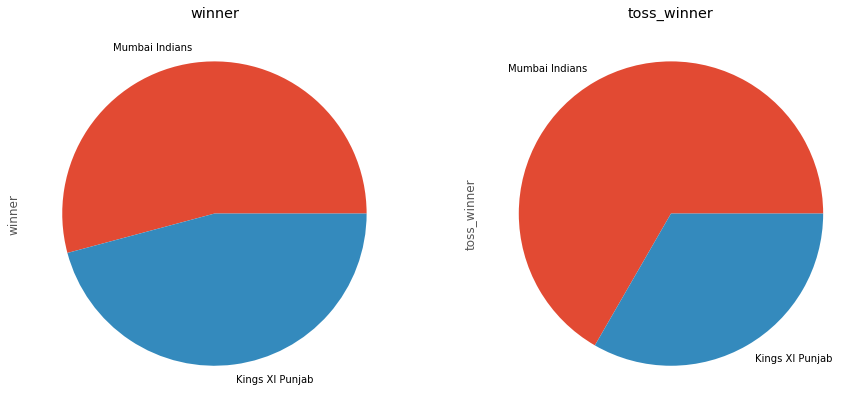

In [11]:
plot_helper(mi_kxip,['winner','toss_winner',],(15,7),'pie')

In [12]:
def plot_helper(df,columns,size,plot_type):
    length=len(columns)
    fig,ax=plt.subplots(nrows=length,figsize=size)
    for i in range(length):
        df[columns[i]].value_counts().plot(kind=plot_type,ax=ax[i],color='g',alpha=0.6)
        ax[i].set_title(columns[i])

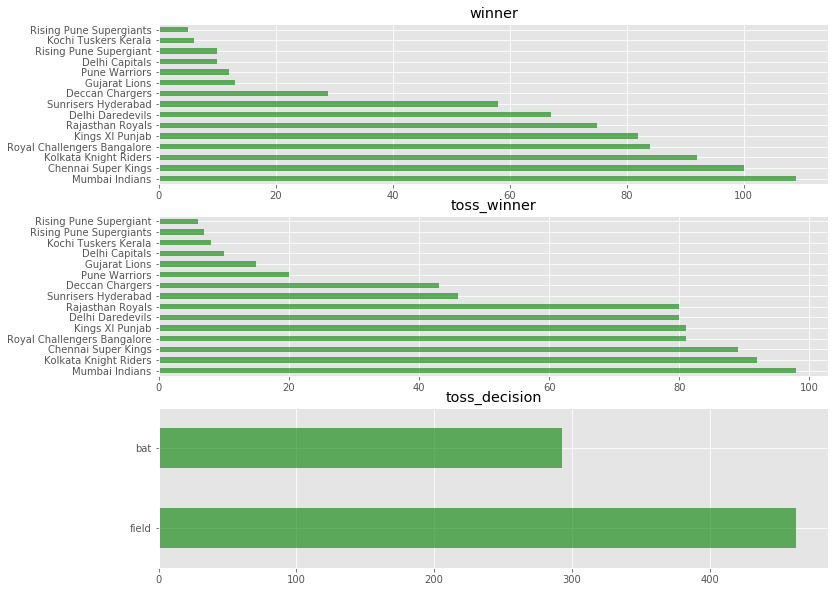

In [13]:
plot_helper(matches,['toss_decision','toss_winner','winner'][::-1],(12,10),'barh')

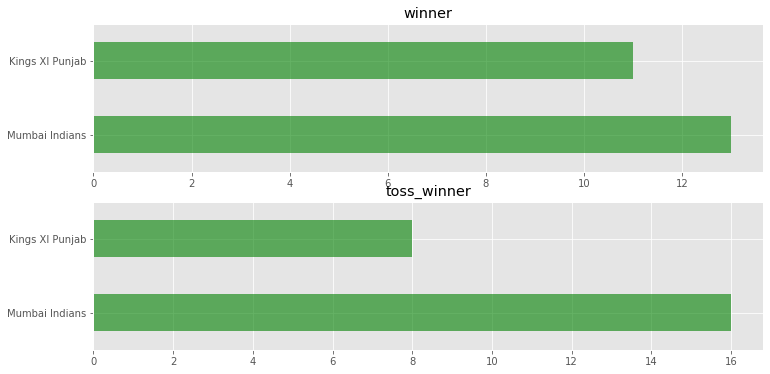

In [14]:
plot_helper(mi_kxip,['toss_winner','winner'][::-1],(12,6),'barh')

### Mumbai Indian is more likely to win out of the two teams 

## Q2

In [15]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               756 non-null    int64         
 1   season           756 non-null    int64         
 2   city             749 non-null    object        
 3   date             756 non-null    datetime64[ns]
 4   team1            756 non-null    object        
 5   team2            756 non-null    object        
 6   toss_winner      756 non-null    object        
 7   toss_decision    756 non-null    object        
 8   result           756 non-null    object        
 9   dl_applied       756 non-null    int64         
 10  winner           752 non-null    object        
 11  win_by_runs      756 non-null    int64         
 12  win_by_wickets   756 non-null    int64         
 13  player_of_match  752 non-null    object        
 14  venue            756 non-null    object   

In [28]:
qde=deliveries[deliveries.player_dismissed=='Q de Kock']
qde.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
95097,402,1,Sunrisers Hyderabad,Pune Warriors,2,7,Q de Kock,PA Patel,AB Dinda,0,...,0,0,0,0,0,0,0,Q de Kock,caught,MR Marsh
95924,405,2,Sunrisers Hyderabad,Kings XI Punjab,1,4,Q de Kock,PA Reddy,P Kumar,0,...,0,0,0,0,0,0,0,Q de Kock,bowled,NaN
97962,414,1,Sunrisers Hyderabad,Chennai Super Kings,1,3,Q de Kock,S Dhawan,MM Sharma,0,...,0,0,0,0,0,0,0,Q de Kock,caught,M Vijay
111245,469,2,Delhi Daredevils,Sunrisers Hyderabad,12,2,Q de Kock,M Vijay,KV Sharma,0,...,0,0,0,0,0,0,0,Q de Kock,caught,AJ Finch
112109,473,2,Delhi Daredevils,Mumbai Indians,7,5,Q de Kock,M Vijay,CJ Anderson,0,...,0,0,0,0,0,0,0,Q de Kock,caught,MEK Hussey


In [29]:
qde.bowler.value_counts()

YS Chahal          3
MJ McClenaghan     3
R Ashwin           2
DL Chahar          2
MM Sharma          2
AD Russell         2
AB Dinda           2
KV Sharma          2
SR Watson          1
S Kaul             1
P Kumar            1
I Sharma           1
SN Thakur          1
CJ Anderson        1
MA Starc           1
DS Kulkarni        1
MC Henriques       1
S Gopal            1
UT Yadav           1
PP Chawla          1
IC Pandey          1
P Krishna          1
Harbhajan Singh    1
KH Pandya          1
SP Narine          1
DW Steyn           1
M Ali              1
BB Sran            1
S Kaushik          1
DJ Bravo           1
Mohammed Shami     1
MP Stoinis         1
PV Tambe           1
S Nadeem           1
J Archer           1
Kuldeep Yadav      1
D Short            1
AR Patel           1
Name: bowler, dtype: int64

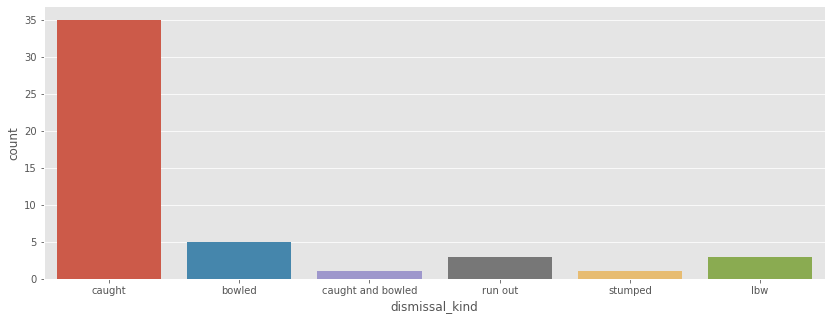

In [30]:
plt.figure(figsize=(14,5))
sns.countplot(qde.dismissal_kind)

sns.despine()

### Q de kock is most likely to get out by a fast ball

## Q3

In [19]:
kxipdeli.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
713,4,1,Rising Pune Supergiant,Kings XI Punjab,1,1,AM Rahane,MA Agarwal,Sandeep Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
714,4,1,Rising Pune Supergiant,Kings XI Punjab,1,2,MA Agarwal,AM Rahane,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
715,4,1,Rising Pune Supergiant,Kings XI Punjab,1,3,MA Agarwal,AM Rahane,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
716,4,1,Rising Pune Supergiant,Kings XI Punjab,1,4,MA Agarwal,AM Rahane,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
717,4,1,Rising Pune Supergiant,Kings XI Punjab,1,5,MA Agarwal,AM Rahane,Sandeep Sharma,0,...,0,0,0,0,0,0,0,MA Agarwal,bowled,NaN


In [20]:
'''kxip_wickets=kxipdeli[kxipdeli.batting_team=='Kings XI Punjab'].groupby(['match_id','over'],as_index=False).sum()
kxip_wickets=kxip_wickets.query('over<=6').groupby('match_id').sum()
kxip_wickets.head(5)'''

"kxip_wickets=kxipdeli[kxipdeli.batting_team=='Kings XI Punjab'].groupby(['match_id','over'],as_index=False).sum()\nkxip_wickets=kxip_wickets.query('over<=6').groupby('match_id').sum()\nkxip_wickets.head(5)"

In [21]:
kxipwickets=kxipdeli[(kxipdeli.batting_team=='Kings XI Punjab') & (kxipdeli.over<=6) & (kxipdeli.dismissal_kind!='run out')].groupby('match_id').count().dismissal_kind
kxipwickets.head()

match_id
4     2
8     1
11    1
15    3
19    2
Name: dismissal_kind, dtype: int64

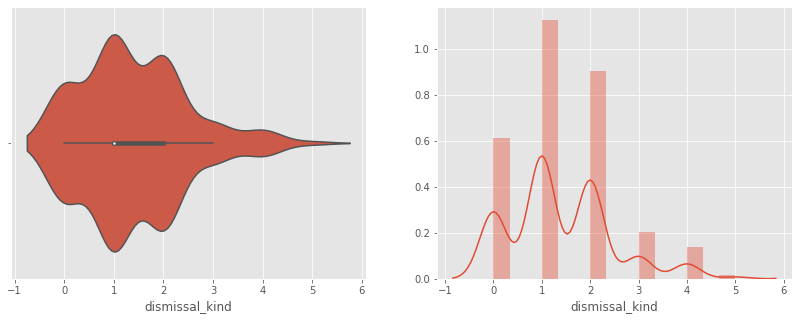

In [22]:
fig,ax=plt.subplots(ncols=2,figsize=(14,5))
sns.violinplot(kxipwickets,ax=ax[0])
sns.distplot(kxipwickets,ax=ax[1])

In [23]:
kxipwickets.describe()

count    176.000000
mean       1.392045
std        1.063549
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: dismissal_kind, dtype: float64

### Through the above analysis it can be determined that KXIP will lose 1-2 wickets in the powerplay 

## Q4

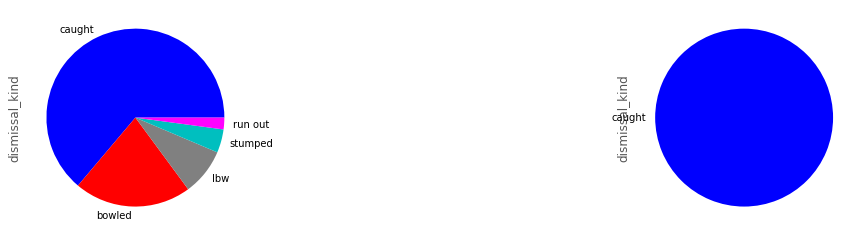

In [24]:
fig=plt.figure(figsize=(20,9))
fig.add_subplot(221)
deliveries.query('player_dismissed==\'KL Rahul\'').dismissal_kind.value_counts(dropna=False).plot.pie(colors=['b','r','gray','c','magenta'])

fig.add_subplot(222)
mi_kxipdeli.query('player_dismissed==\'KL Rahul\'').dismissal_kind.value_counts(dropna=False).plot.pie(colors='b')


### As we can see there is a high probability that KL Rahul will be out by his ball getting caught by a fielder.

## Q5

### We can ignore the zeroes as they are just null values and subtract the values by 10 to get the no. of wickets lost.

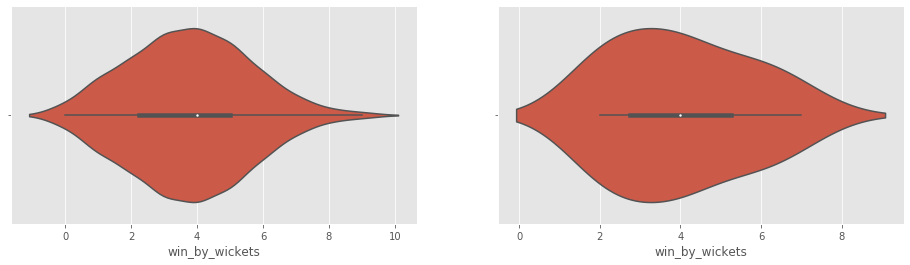

In [25]:
fig,ax=plt.subplots(ncols=2,figsize=(16,4),)
sns.violinplot(10-matches.win_by_wickets.replace(0,np.nan),ax=ax[0])
sns.violinplot(10-mi_kxip.win_by_wickets.replace(0,np.nan),ax=ax[1])

In [26]:
10-matches.win_by_wickets.describe()

count   -746.000000
mean       6.649471
std        6.612037
min       10.000000
25%       10.000000
50%        6.000000
75%        4.000000
max        0.000000
Name: win_by_wickets, dtype: float64

In [27]:
10-mi_kxip.win_by_wickets.describe()

count   -14.000000
mean      7.000000
std       6.716312
min      10.000000
25%      10.000000
50%       8.500000
75%       4.000000
max       2.000000
Name: win_by_wickets, dtype: float64

### There can be around 11-15 wickets lost in the entire match as the average indicates even though the distribution says a little different as their is a positive deviation of 6+